In [ ]:
import os
!pip install -Uqq fastai duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=50):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('happy human face', max_images=1)
urls[0]

Searching for 'happy human face'


'https://images.fineartamerica.com/images-medium-large-5/smiling-face-mark-thomasscience-photo-library.jpg'

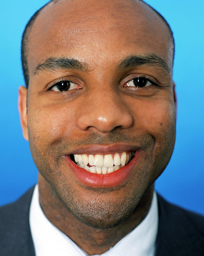

In [ ]:
from fastdownload import download_url
dest = 'happy.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'sad human face'


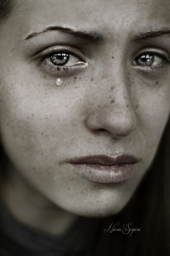

In [ ]:
download_url(search_images('sad human face', max_images=1)[0], 'sad.jpg', show_progress=False)
Image.open('sad.jpg').to_thumb(256,256)

Searching for 'angry human face'


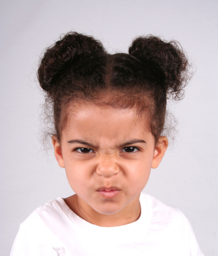

In [ ]:
download_url(search_images('angry human face', max_images=1)[0], 'angry.jpg', show_progress=False)
Image.open('angry.jpg').to_thumb(256,256)

Searching for 'fear human face'


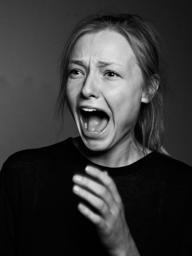

In [ ]:
download_url(search_images('fear human face', max_images=1)[0], 'fear.jpg', show_progress=False)
Image.open('fear.jpg').to_thumb(256,256)

Searching for 'surprise face'


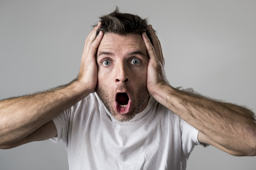

In [ ]:
download_url(search_images('surprise face', max_images=1)[0], 'surprise.jpg', show_progress=False)
Image.open('surprise.jpg').to_thumb(256,256)

In [ ]:
searches = 'happy human face','sad human face','fear human face','angry human face','surprise human face'
path = Path('emotions')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} bright lighting'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} dark lighting'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'happy human face photo'
Searching for 'happy human face bright lighting'
Searching for 'happy human face dark lighting'


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'sad human face photo'
Searching for 'sad human face bright lighting'
Searching for 'sad human face dark lighting'
Searching for 'fear human face photo'
Searching for 'fear human face bright lighting'
Searching for 'fear human face dark lighting'
Searching for 'angry human face photo'
Searching for 'angry human face bright lighting'
Searching for 'angry human face dark lighting'
Searching for 'surprise human face photo'
Searching for 'surprise human face bright lighting'
Searching for 'surprise human face dark lighting'


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

27

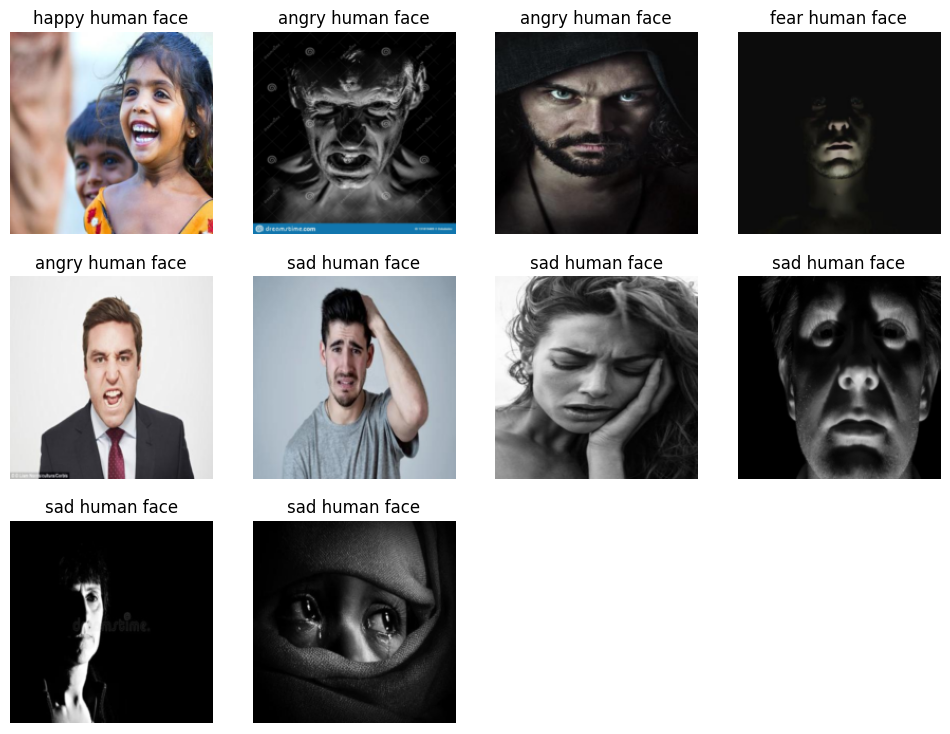

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=10)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.148727,1.240907,0.419890,03:08


epoch,train_loss,valid_loss,error_rate,time
0,1.086382,0.884609,0.232044,04:31
1,0.825021,0.631763,0.185083,04:26
2,0.579412,0.584722,0.201657,04:27


In [ ]:
# Make predictions for multiple emotions
emotions = ["sad", "angry", "fear", "surprise"]
results = []

for emotion in emotions:
    is_emotion, _, probs = learn.predict(PILImage.create(f'/content/fear.jpg'))
    results.append((emotion, is_emotion, probs[0]))

# Find the emotion with the highest probability
highest_emotion, _, highest_prob = max(results, key=lambda x: x[2])

# Print the result for the emotion with the highest probability
print(f"This is a: {highest_emotion}.")
print(f"Probability it's a {highest_emotion} face: {highest_prob:.4f}")

This is a: sad_human_face.
Probability it's a sad_human_face face: 0.0000


In [ ]:
is_human_face,_,probs = learn.predict(PILImage.create('/content/angry.jpg'))
print(f"This is a: {is_human_face}.")
print(f"Probability it's a {is_human_face}: {probs[0]:.4f}")

This is a: angry human face.
Probability it's a angry human face: 0.9114
